In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                         summarize,
                         poly)
from statsmodels.stats.anova import anova_lm
from matplotlib.pyplot import subplots

# 8

In [21]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [22]:
y = Auto['mpg']
x = Auto['horsepower']

# Combined fit and transform
design = MS(['horsepower'])
x = design.fit_transform(Auto)
display(x.head())

model = sm.OLS(y, x)
results = model.fit()
display(summarize(results=results))

results.summary()

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150
ford torino,1.0,140


,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           7.03e-81
Time:                        23:23:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To assess how far the relationship is strong we should check the percentage of variance explained by the model. For this we should use the 
 indicator or the RSE

In [23]:
display(results.rsquared_adj)  # R2 measures the proportion of variability in Y that can be explained by X R2 = 1 - RSS/TSS TSS = sum((y - mean(y)**2)

0.6049378688071001

Now the conclusion is nearly 60% of the variability of "mpg" can be explained by "horsepower". But what about the interpretation of RSE?! To answer we should compare it with the mean of the response.

In [24]:
#For the residual standard error
rse=np.sqrt(results.scale)
rse

# RSE = sqrt(RSS/(n-2))
lack_fit=rse/np.mean(Auto["mpg"])
lack_fit

0.20923714066914834

Hence, the lack of fit is estimated to 20,92%

In [25]:
new_x = pd.DataFrame({'horsepower':[98]})
new_x = design.transform(new_x)
new_x

,intercept,horsepower
0,1.0,98


In [26]:
predictions = results.get_prediction(new_x)

display(predictions.predicted_mean)

display(predictions.conf_int(alpha=0.01))

display(predictions.conf_int(alpha=0.01, obs=True))

array([24.46707715])

array([[23.81668604, 25.11746826]])

array([[11.75190927, 37.18224503]])

# 9

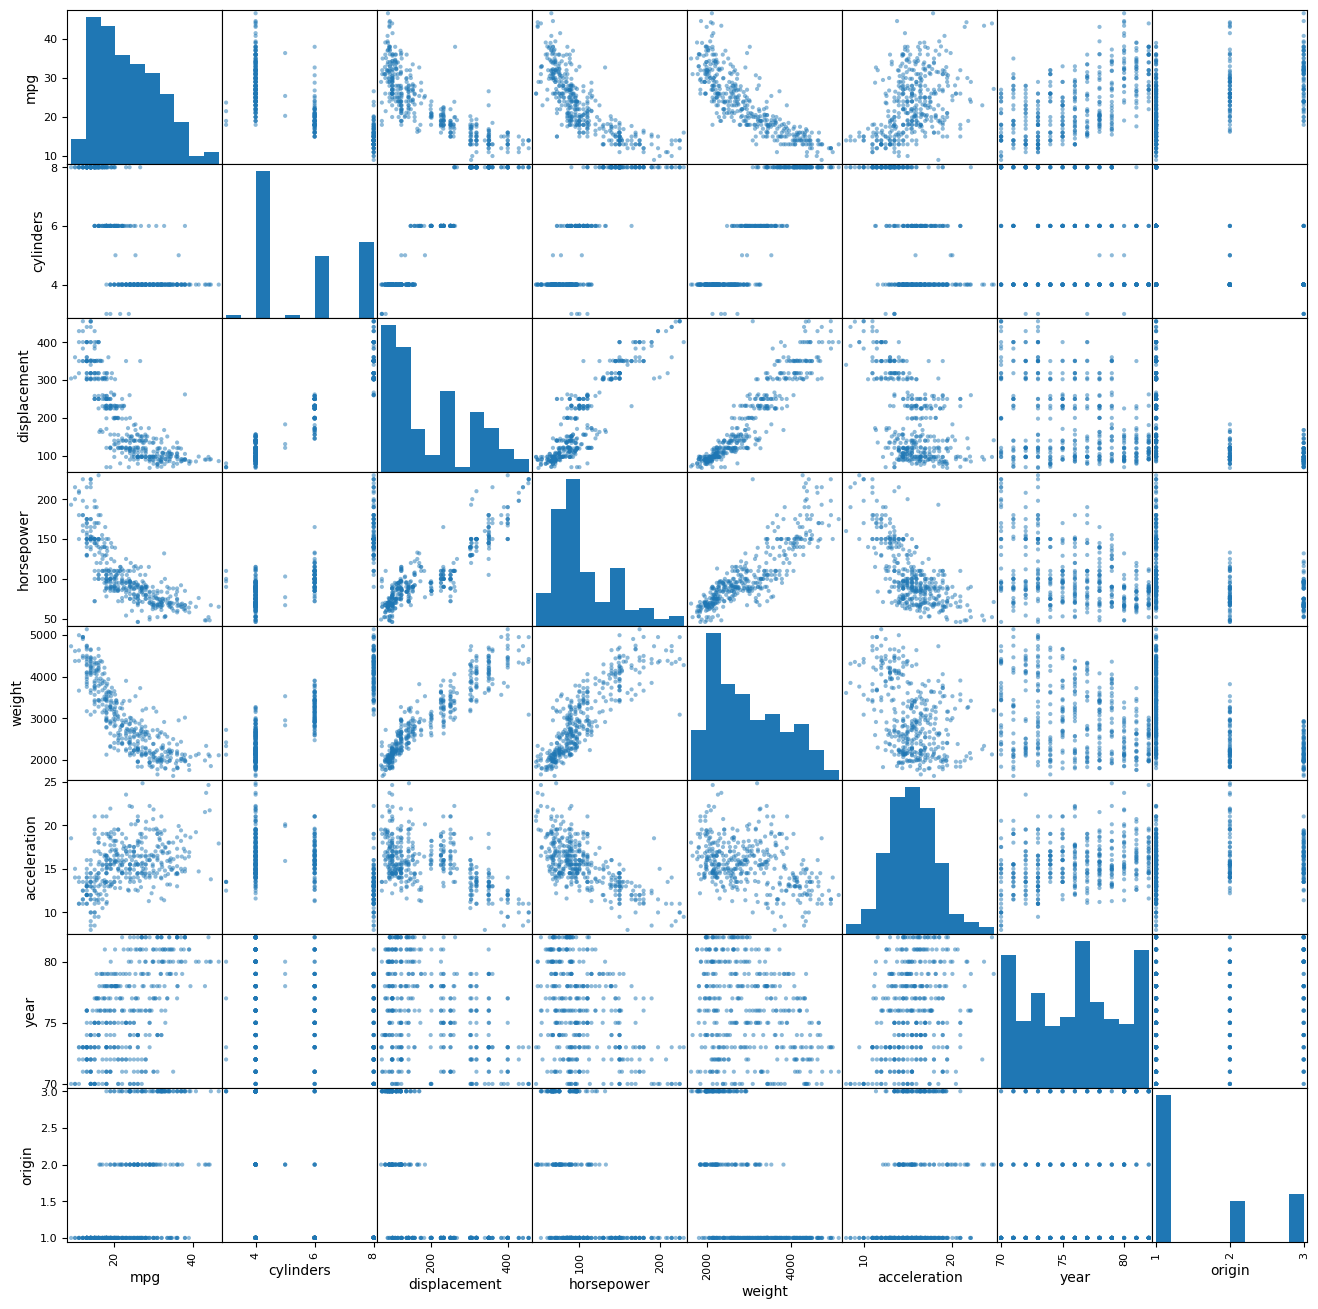

In [27]:
pd.plotting.scatter_matrix(Auto, figsize=(16, 16));

In [28]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [29]:
y = Auto['mpg']
x = Auto.drop(columns=['mpg'])

# Combined fit and transform
design = MS(x.columns)
x = design.fit_transform(Auto)
display(x.head())

model = sm.OLS(y, x)
results_multi = model.fit()
display(summarize(results=results_multi))

results_multi.summary()

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,1.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,1.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,1.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,1.0,8,304.0,150,3433,12.0,70,1
ford torino,1.0,8,302.0,140,3449,10.5,70,1


,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 29 Jan 2026   Prob (F-statistic):          2.04e-139
Time:                        23:24:24   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
anova_lm(results, results_multi) # Hypothesis testing - bigger model is not needed is the null pyopthesis and alt. hypothesis is its superior

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


The F-statistic is high and the p-vlaue is negligible hence proving that there is a relation between the response and the predictors

In [38]:
results_multi.pvalues[results_multi.pvalues < 0.05] # 95% statistical significance

intercept       2.401841e-04
displacement    8.444649e-03
weight          7.874953e-21
year            3.055983e-39
origin          4.665681e-07
dtype: float64

In [40]:
results_multi.params['year']

0.7507726779503134

mpg increase by 0.75 every year

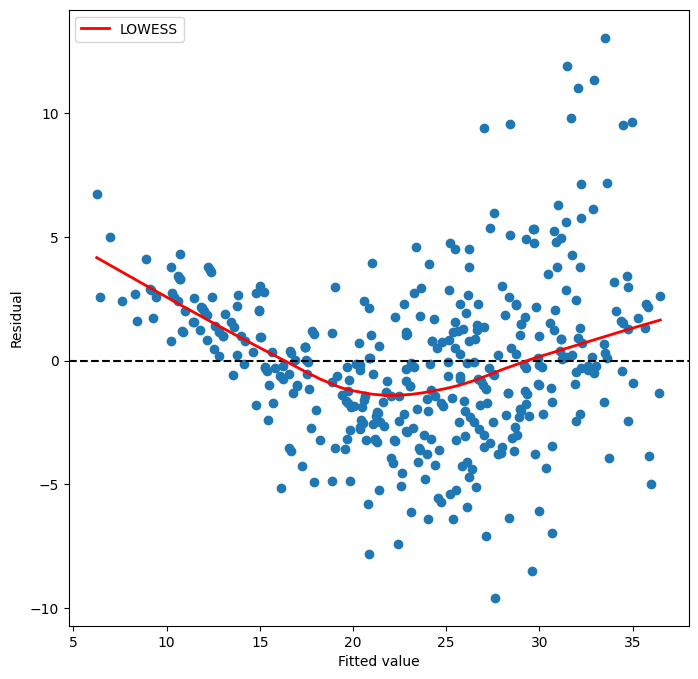

In [43]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results_multi.fittedvalues , results_multi.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

# add a smooth LOWESS curve to show the trend
smoothed = sm.nonparametric.lowess(results_multi.resid, results_multi.fittedvalues, frac=0.6)
ax.plot(smoothed[:,0], smoothed[:,1], color='red', lw=2, label='LOWESS')
ax.legend()

0.020408163265306034

0.02040816326530612

13

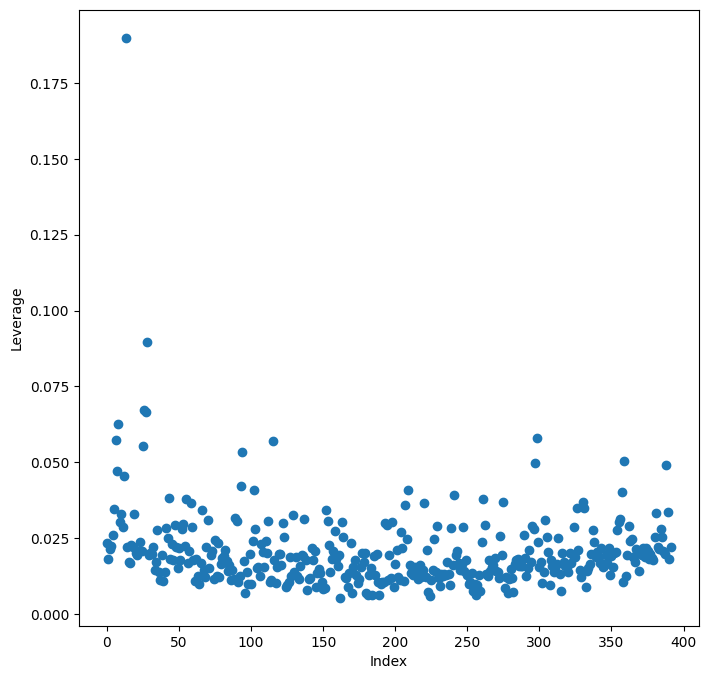

In [50]:
# get influence and compare empirical and theoretical average leverage
infl = results_multi.get_influence()
h_avg_emp = np.mean(infl.hat_matrix_diag)
h_avg_theory = x.shape[1] / x.shape[0]         # use (x.shape[1]+1)/x.shape[0] if x has no intercept
display(h_avg_emp, h_avg_theory)

ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(x.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)  # Prints the datapoint with maximum leverage

From the residuals plot we can see that the U-shape persists indicating that the true underlying relationship between the predictors and the response isn’t linear.

We can also see a few large residuals but they’re not unusual due to the difference between the true underlying relationship and the used model.



In [53]:
np.arange(x.shape[0])[infl.hat_matrix_diag/h_avg_emp > 4]

array([13, 28])

In [ ]:
from typing import Iterable, Callable, List, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

def regression_simulation(
    functions: Iterable[Callable],
    list_of_features: List[str],
    data: pd.DataFrame = Auto,
    alpha: float = 0.05,
    baseline_features: List[str] | None = None,
) -> List[Tuple[str, sm.regression.linear_model.RegressionResultsWrapper]]:
    """
    For each transformer in `functions`, transform data[list_of_features], fit OLS to mpg,
    display basic summaries, compare to a simple baseline with ANOVA (if applicable),
    plot residuals vs fitted (LOWESS) and leverage plot. Returns list of (label, results).
    """
    y = data['mpg']
    if baseline_features is None:
        baseline_features = [list_of_features[0]]

    # baseline model
    X_base = sm.add_constant(data[baseline_features], has_constant='add')
    base_res = sm.OLS(y, X_base).fit()

    fitted_results = []
    for fn in functions:
        label = getattr(fn, "__name__", repr(fn))
        print(f"\n=== Transform: {label} ===")

        # try applying transformer; accept fn(DataFrame) or fn(DataFrame[features])
        try:
            X_raw = fn(data[list_of_features])
        except TypeError:
            try:
                X_raw = fn(data)
            except Exception as e:
                print(f"Skipping {label}: transformer failed -> {e}")
                continue
        except Exception as e:
            print(f"Skipping {label}: transformer failed -> {e}")
            continue

        # normalize to DataFrame
        if isinstance(X_raw, pd.Series):
            X = X_raw.to_frame()
        elif isinstance(X_raw, pd.DataFrame):
            X = X_raw.copy()
        elif isinstance(X_raw, (np.ndarray, list, tuple)):
            X = pd.DataFrame(np.asarray(X_raw), index=data.index)
            X.columns = [f"V{i}" for i in range(1, X.shape[1]+1)]
        else:
            print(f"Skipping {label}: unsupported return type {type(X_raw)}")
            continue

        # ensure index alignment and add constant if missing
        X = X.reindex(data.index)
        if not any(c.lower() in ("const", "intercept", "constant") for c in X.columns):
            X = sm.add_constant(X, has_constant='add')

        # fit model
        res = sm.OLS(y, X).fit()
        fitted_results.append((label, res))

        # display summaries
        display(res.summary())  # keep notebook-friendly
        print("Significant predictors (p < {:.2f}):".format(alpha))
        display(res.pvalues[res.pvalues < alpha])
        print("Non-significant predictors:")
        display(res.pvalues[res.pvalues >= alpha])

        # ANOVA vs baseline (if comparable)
        try:
            display(anova_lm(base_res, res))
        except Exception as e:
            print("ANOVA comparison skipped:", e)

        # Residuals vs fitted with LOWESS
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.scatter(res.fittedvalues, res.resid, alpha=0.6, s=30, edgecolor='k')
        ax.axhline(0, color='k', ls='--')
        ax.set_title(f"Residuals vs Fitted — {label}")
        ax.set_xlabel("Fitted")
        ax.set_ylabel("Residual")

        smoothed = sm.nonparametric.lowess(res.resid, res.fittedvalues, frac=0.6)
        ax.plot(smoothed[:, 0], smoothed[:, 1], color='red', lw=2)
        # annotate top 3 residuals
        abs_res = np.abs(res.resid)
        top_idx = abs_res.nlargest(3).index
        for i in top_idx:
            ax.annotate(str(i), (res.fittedvalues.loc[i], res.resid.loc[i]), xytext=(5,5), textcoords='offset points', color='blue', fontsize=9)
        plt.show()

        # Leverage/influence
        infl = res.get_influence()
        h = infl.hat_matrix_diag
        h_avg_emp = np.mean(h)
        h_avg_theory = X.shape[1] / X.shape[0]
        print("Avg leverage (empirical, theoretical):", h_avg_emp, h_avg_theory)

        fig, ax = plt.subplots(figsize=(8, 3.5))
        ax.scatter(np.arange(X.shape[0]), h, alpha=0.7)
        high = np.where(h > 2 * h_avg_emp)[0]
        if len(high):
            ax.scatter(high, h[high], facecolors='none', edgecolors='red', s=80, linewidths=1.5)
            for idx in high:
                ax.annotate(str(X.index[idx]), (idx, h[idx]), xytext=(3,3), textcoords='offset points', color='red', fontsize=8)
        ax.set_xlabel('Index'); ax.set_ylabel('Leverage'); ax.set_title(f'Leverage — {label}')
        plt.show()

    return fitted_results
